# Data Prep

In [5]:
!pip install statsmodels
!pip install -U seaborn
!pip install lifelines
!pip install scikit-learn

In [6]:
# Imports here.
import numpy as np
import pandas as pd
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import scipy
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest

# Create density plot function

In [7]:
def density_plot(groups, column):

    # Iterate through the two groups
    for group in groups:
        # Subset
        subset = df_prs[df_prs[column] == group]

        # Draw the density plot
        plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = group)

    # Plot formatting
    plt.legend(prop={'size': 16}, title = column)
    plt.set_title(title)
    plt.set_xlabel(f'{ndd} PRS')
    plt.set_ylabel('Density')

# PD

In [8]:
# Set variables
ndd = 'PD'
df_prs = pd.read_csv(f'{ndd}_with_Z_score_for_graphs_april_30.csv')
df_prs

,ID,GENETIC_SEX,TOWNSEND,AGE,PD,QC0_F51_DATE,QC0_G47_DATE,SCORE,PC1,PC2,...,Z_score,Z_age,Z_PC1,Z_PC2,Z_PC3,Z_PC4,Z_PC5,status,F51 Disorder,G47 Disorder
0,5986755,1,-3.86,60,1,0,0,-0.005752,-13.3959,5.89336,...,0.818861,0.292830,-0.646379,1.410784,-0.509728,-0.468347,0.108360,case,no,no
1,5091212,1,2.50,67,1,0,0,-0.012065,-10.3817,3.22082,...,-1.125486,1.310861,1.223686,-0.372161,0.740454,0.781701,-0.846950,case,no,no
2,5164402,1,-4.03,63,1,0,0,-0.006186,-11.7090,2.20405,...,0.685058,0.729129,0.400205,-1.050483,-0.306826,0.845304,-0.687527,case,no,no
3,1942953,2,-4.31,56,1,0,0,-0.011824,-13.5989,2.63708,...,-1.051476,-0.288902,-0.772324,-0.761594,-2.663216,2.644282,1.781772,case,no,no
4,2548358,2,-1.52,68,1,0,0,-0.004134,-12.9616,4.96654,...,1.317089,1.456294,-0.376931,0.792470,-0.804696,0.767982,0.488929,case,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240905,5988964,2,-2.90,67,0,0,0,-0.008323,-13.4550,4.31271,...,0.026795,1.310861,-0.683045,0.356277,0.558019,-0.648933,-1.099520,control,no,no
240906,3181859,1,-0.68,64,0,0,0,-0.008959,-13.2968,5.55025,...,-0.169099,0.874562,-0.584895,1.181883,-0.811480,0.471989,1.938749,control,no,no
240907,5906295,1,5.84,61,0,0,0,-0.003869,-12.6670,4.92301,...,1.398833,0.438263,-0.194156,0.763429,0.847535,1.515440,3.159955,control,no,no
240908,5866742,1,-1.32,62,0,0,0,-0.005556,-11.7895,4.66550,...,0.878974,0.583696,0.350261,0.591636,1.394767,-1.526768,-1.220853,control,no,no


## Comparing PRS of cases and controls

PD Status 
Cases: 2886
Controls:  238024
T_test
Ttest_indResult(statistic=16.844538978017905, pvalue=1.251534487817906e-63)


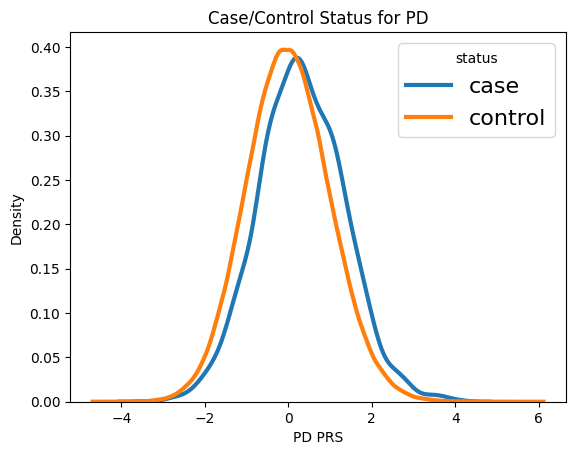

In [9]:
groups = ['case', 'control']
column = 'status'
title = f'Case/Control Status for {ndd}'
density_plot(groups, column)

cases = df_prs[df_prs['status']=='case']
controls = df_prs[df_prs['status']=='control']

print(f'{ndd} Status ')
print("Cases:", len(cases))
print('Controls: ', len(controls))

print('T_test')
print(stats.ttest_ind(cases.Z_score, controls.Z_score))

## Comparing PRS of people with and without F51 Sleep Disorder

F51 Disorder
People with disorder: 161
People without disorder: 240749
T_test
Ttest_indResult(statistic=-0.4181661089974075, pvalue=0.6758260456076731)


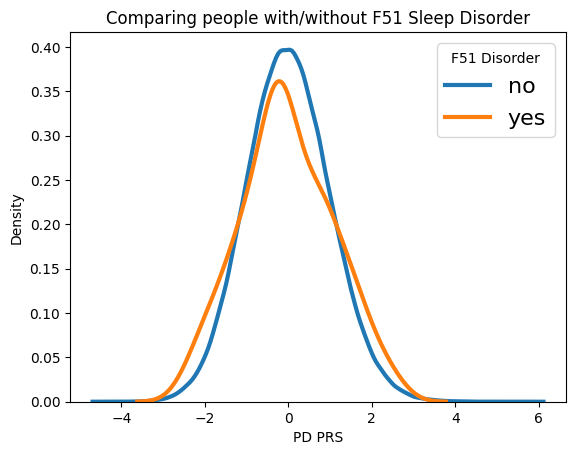

In [10]:
groups = ['no', 'yes']
column = 'F51 Disorder'
title = 'Comparing people with/without F51 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## Comparing PRS of people with/without G47 Sleep Disorder

G47 Disorder
People with disorder: 7393
People without disorder: 233517
T_test
Ttest_indResult(statistic=-1.0953704947369558, pvalue=0.2733554500365706)


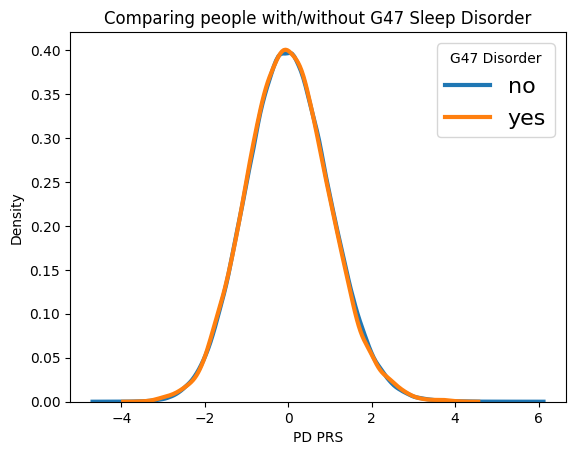

In [12]:
groups = ['no', 'yes']
column = 'G47 Disorder'
title = 'Comparing people with/without G47 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## People with PD AND F51 Disorder

Text(0, 0.5, 'Density')

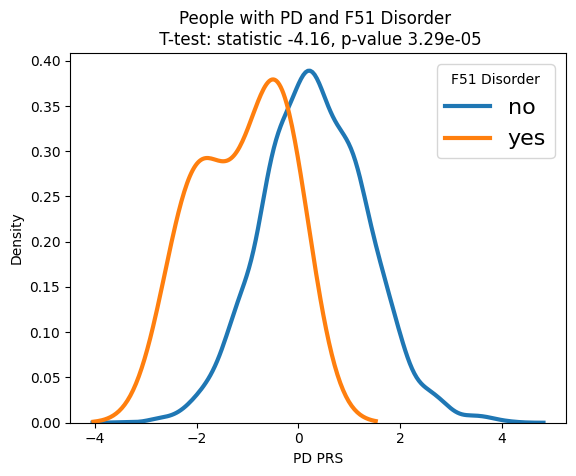

In [13]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(7)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [14]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

PD and F51 Disorder
People with PD and F51 Disorder: 9
People with PD and without F51 Disorder: 2877


In [15]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-4.158836233680722, pvalue=3.292060737483168e-05)


## People with PD AND G47 Disorder

Text(0, 0.5, 'Density')

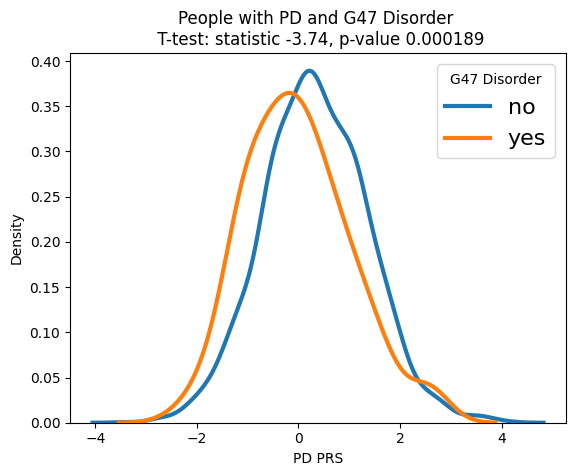

In [16]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(6)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [17]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

PD and G47 Disorder
People with PD and G47 Disorder: 130
People with PD and without G47 Disorder: 2756


In [18]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-3.7379718930429897, pvalue=0.00018911281738204596)


## Controls with F51 Disorder

Text(0, 0.5, 'Density')

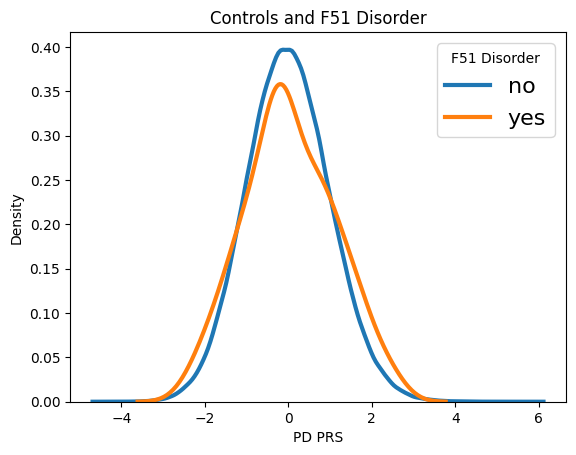

In [19]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [20]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without F51 Disorder
Controls and F51 Disorder: 152
Controls without F51 Disorder: 237872


In [21]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=0.42851026880784, pvalue=0.6682800467070894)


## Controls with G47 Disorder

Text(0, 0.5, 'Density')

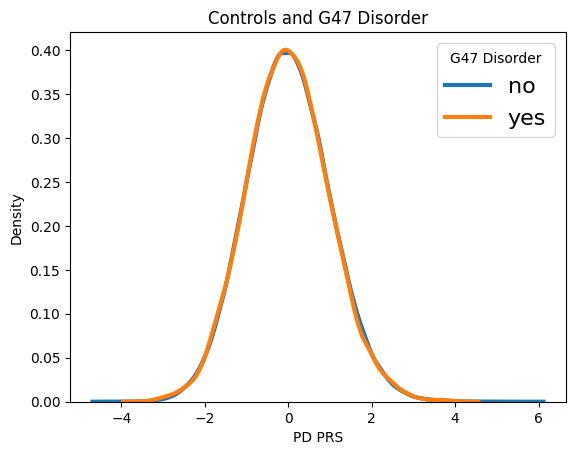

In [22]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [23]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without G47 Disorder
Controls and G47 Disorder: 7263
Controls without G47 Disorder: 230761


In [24]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-0.7507637978747118, pvalue=0.4527955624533724)


# AD - with APOE

In [27]:
# Set variables
ndd = 'AD'
df_prs = pd.read_csv(f'{ndd}_with_Z_score_for_graphs_april_30.csv')
df_prs

,ID,GENETIC_SEX,TOWNSEND,AGE,AD,QC0_F51_DATE,QC0_G47_DATE,SCORE,PC1,PC2,...,Z_score,Z_age,Z_PC1,Z_PC2,Z_PC3,Z_PC4,Z_PC5,status,F51 Disorder,G47 Disorder
0,3559505,2,-2.80,67,1,0,0,-0.001782,-12.3277,2.811810,...,-0.538542,1.302759,0.017380,-0.645318,-2.274266,1.586153,0.210944,case,no,no
1,5426874,1,-4.78,68,1,0,0,0.013916,-15.3076,3.797150,...,1.951025,1.447955,-1.831776,0.012349,-0.909258,0.886333,1.045509,case,no,no
2,1940961,1,-0.47,63,1,0,0,-0.002174,-12.6428,2.248000,...,-0.600591,0.721973,-0.178153,-1.021635,-1.788856,-1.285690,-0.226286,case,no,no
3,2893229,1,-2.66,59,1,0,0,0.000242,-14.0739,0.909499,...,-0.217409,0.141187,-1.066212,-1.915021,-0.378878,0.311419,-1.175521,case,no,no
4,5784514,2,-5.08,54,1,0,0,0.012221,-12.6081,2.801040,...,1.682297,-0.584796,-0.156621,-0.652507,1.048356,0.388785,0.276297,case,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241574,5988964,2,-2.90,67,0,0,0,-0.000062,-13.4550,4.312710,...,-0.265658,1.302759,-0.682158,0.356461,0.558709,-0.649165,-1.098924,control,no,no
241575,3181859,1,-0.68,64,0,0,0,0.001470,-13.2968,5.550250,...,-0.022737,0.867169,-0.583988,1.182460,-0.811024,0.471208,1.935743,control,no,no
241576,5906295,1,5.84,61,0,0,0,0.010032,-12.6670,4.923010,...,1.335036,0.431580,-0.193171,0.763807,0.848275,1.514147,3.155501,control,no,no
241577,5866742,1,-1.32,62,0,0,0,-0.000596,-11.7895,4.665500,...,-0.350322,0.576776,0.351356,0.591932,1.395601,-1.526569,-1.220114,control,no,no


## Comparing PRS of cases and controls

AD Status 
Cases: 3581
Controls:  237998
T_test
Ttest_indResult(statistic=59.41652513162312, pvalue=0.0)


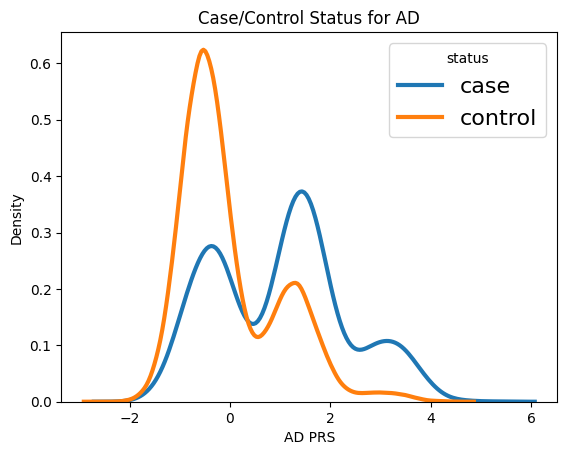

In [28]:
groups = ['case', 'control']
column = 'status'
title = f'Case/Control Status for {ndd}'
density_plot(groups, column)

cases = df_prs[df_prs['status']=='case']
controls = df_prs[df_prs['status']=='control']

print(f'{ndd} Status ')
print("Cases:", len(cases))
print('Controls: ', len(controls))

print('T_test')
print(stats.ttest_ind(cases.Z_score, controls.Z_score))

## Comparing PRS of people with and without F51 Sleep Disorder

F51 Disorder
People with disorder: 155
People without disorder: 241424
T_test
Ttest_indResult(statistic=1.4828796947985534, pvalue=0.13810768166287446)


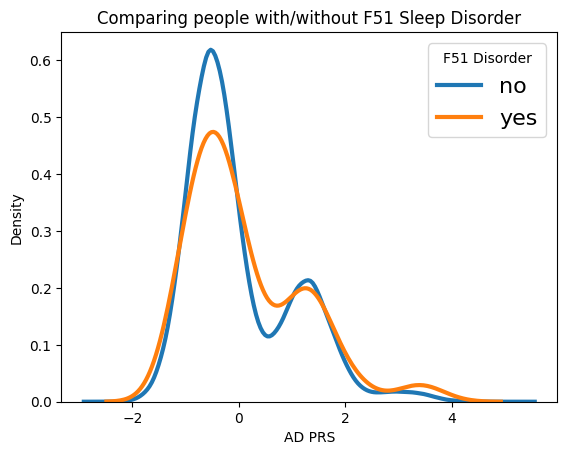

In [31]:
groups = ['no', 'yes']
column = 'F51 Disorder'
title = 'Comparing people with/without F51 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## Comparing PRS of people with/without G47 Sleep Disorder

G47 Disorder
People with disorder: 7396
People without disorder: 234183
T_test
Ttest_indResult(statistic=-1.5808622488378081, pvalue=0.1139108468649623)


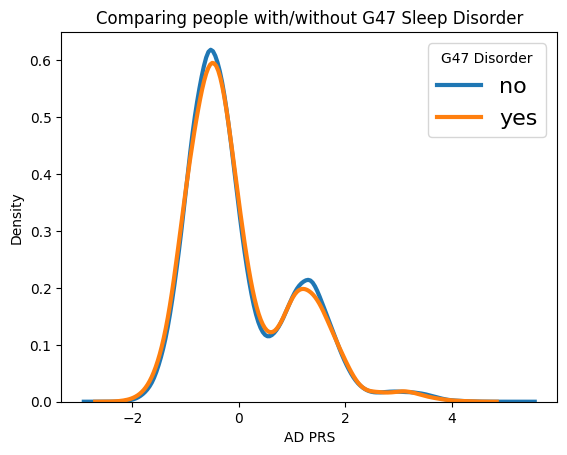

In [32]:
groups = ['no', 'yes']
column = 'G47 Disorder'
title = 'Comparing people with/without G47 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## People with AD AND F51 Disorder

Text(0, 0.5, 'Density')

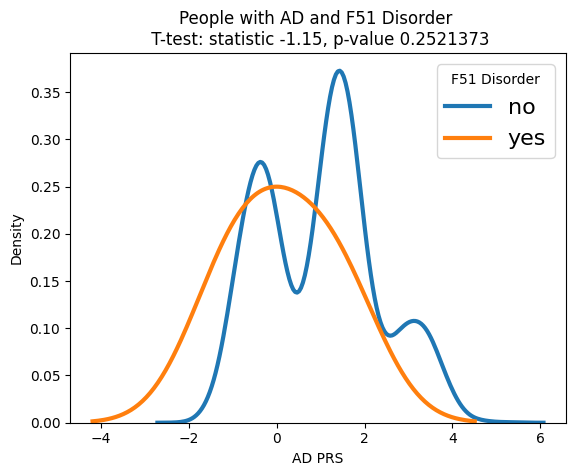

In [33]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(7)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [34]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

AD and F51 Disorder
People with AD and F51 Disorder: 3
People with AD and without F51 Disorder: 3578


In [35]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-1.1453583174781705, pvalue=0.2521373387680468)


## People with AD AND G47 Disorder

Text(0, 0.5, 'Density')

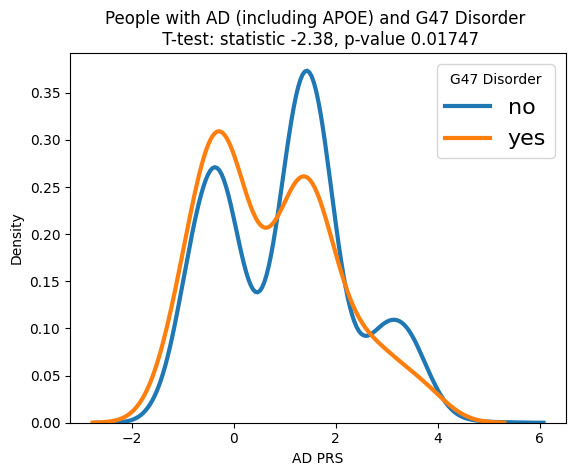

In [36]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(6)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} (including APOE) and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [37]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

AD and G47 Disorder
People with AD and G47 Disorder: 137
People with AD and without G47 Disorder: 3444


In [38]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-2.3777778104314, pvalue=0.017469540903764225)


## Controls with F51 Disorder

Text(0, 0.5, 'Density')

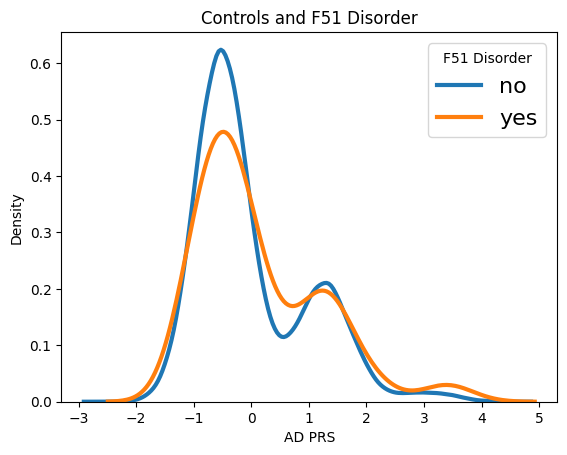

In [39]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [40]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without F51 Disorder
Controls and F51 Disorder: 152
Controls without F51 Disorder: 237846


In [41]:
print('Z_test')
print(ztest(with_ndd_sleep, without, value = 0))
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

Z_test
(1.6716928651396374, 0.09458490180279362)
T_test
Ttest_indResult(statistic=1.6716928651396374, pvalue=0.09458621641455268)


## Controls with G47 Disorder

Text(0, 0.5, 'Density')

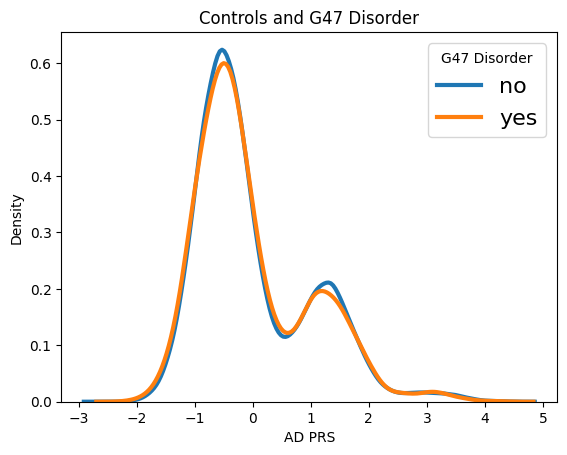

In [42]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [43]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without G47 Disorder
Controls and G47 Disorder: 7259
Controls without G47 Disorder: 230739


In [44]:
print('Z_test')
print(ztest(with_ndd_sleep, without, value = 0))
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

Z_test
(-1.5149418252133189, 0.1297871371514342)
T_test
Ttest_indResult(statistic=-1.5149418252133187, pvalue=0.12978846517065887)


# AD - without APOE

In [45]:
# Set variables
ndd = 'AD'
df_prs = pd.read_csv(f'{ndd}_NO_APOE_with_Z_score_for_graphs_april_30.csv')
df_prs

,ID,GENETIC_SEX,TOWNSEND,AGE,AD,QC0_F51_DATE,QC0_G47_DATE,SCORE,PC1,PC2,...,Z_score,Z_age,Z_PC1,Z_PC2,Z_PC3,Z_PC4,Z_PC5,status,F51 Disorder,G47 Disorder
0,3559505,2,-2.80,67,1,0,0,-0.001864,-12.3277,2.811810,...,-0.057379,1.302759,0.017380,-0.645318,-2.274266,1.586153,0.210944,case,no,no
1,5426874,1,-4.78,68,1,0,0,0.002704,-15.3076,3.797150,...,1.425655,1.447955,-1.831776,0.012349,-0.909258,0.886333,1.045509,case,no,no
2,1940961,1,-0.47,63,1,0,0,-0.002273,-12.6428,2.248000,...,-0.190179,0.721973,-0.178153,-1.021635,-1.788856,-1.285690,-0.226286,case,no,no
3,2893229,1,-2.66,59,1,0,0,0.000253,-14.0739,0.909499,...,0.629943,0.141187,-1.066212,-1.915021,-0.378878,0.311419,-1.175521,case,no,no
4,5784514,2,-5.08,54,1,0,0,0.000933,-12.6081,2.801040,...,0.850472,-0.584796,-0.156621,-0.652507,1.048356,0.388785,0.276297,case,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241574,5988964,2,-2.90,67,0,0,0,-0.000065,-13.4550,4.312710,...,0.526676,1.302759,-0.682158,0.356461,0.558709,-0.649165,-1.098924,control,no,no
241575,3181859,1,-0.68,64,0,0,0,0.001537,-13.2968,5.550250,...,1.046598,0.867169,-0.583988,1.182460,-0.811024,0.471208,1.935743,control,no,no
241576,5906295,1,5.84,61,0,0,0,-0.001356,-12.6670,4.923010,...,0.107250,0.431580,-0.193171,0.763807,0.848275,1.514147,3.155501,control,no,no
241577,5866742,1,-1.32,62,0,0,0,-0.000623,-11.7895,4.665500,...,0.345470,0.576776,0.351356,0.591932,1.395601,-1.526569,-1.220114,control,no,no


## Comparing PRS of cases and controls

AD Status 
Cases: 3581
Controls:  237998
T_test
Ttest_indResult(statistic=17.95921675409776, pvalue=4.529661557987885e-72)


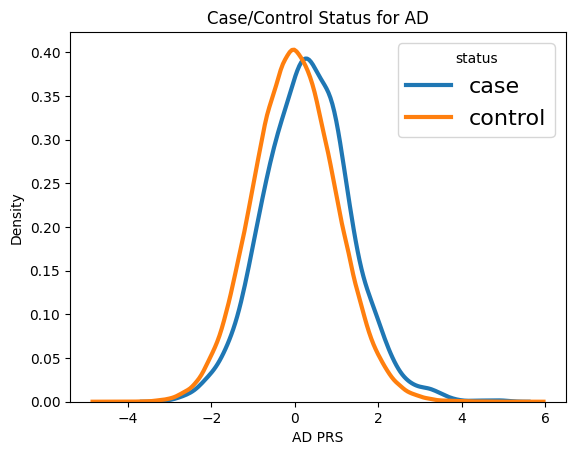

In [46]:
groups = ['case', 'control']
column = 'status'
title = f'Case/Control Status for {ndd}'
density_plot(groups, column)

cases = df_prs[df_prs['status']=='case']
controls = df_prs[df_prs['status']=='control']

print(f'{ndd} Status ')
print("Cases:", len(cases))
print('Controls: ', len(controls))

print('T_test')
print(stats.ttest_ind(cases.Z_score, controls.Z_score))

## Comparing PRS of people with and without F51 Sleep Disorder

F51 Disorder
People with disorder: 155
People without disorder: 241424
T_test
Ttest_indResult(statistic=1.9594610953086167, pvalue=0.05005995999409254)


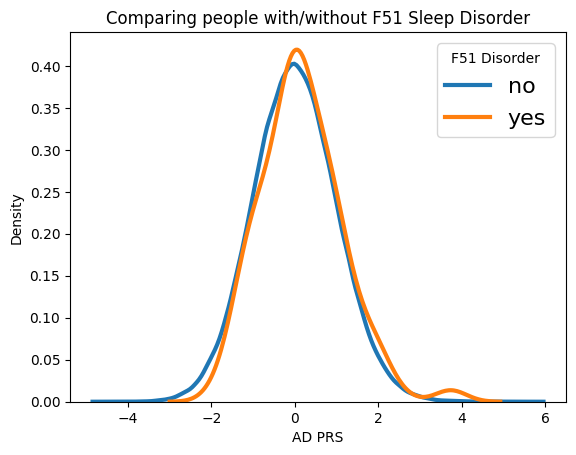

In [47]:
groups = ['no', 'yes']
column = 'F51 Disorder'
title = 'Comparing people with/without F51 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## Comparing PRS of people with/without G47 Sleep Disorder

G47 Disorder
People with disorder: 7396
People without disorder: 234183
T_test
Ttest_indResult(statistic=-0.07974799889795349, pvalue=0.9364377494469031)


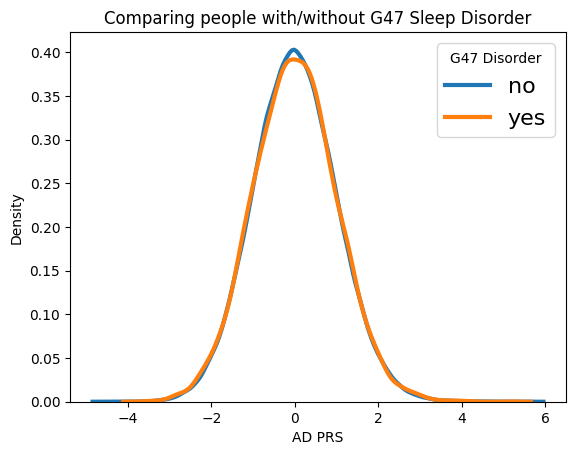

In [49]:
groups = ['no', 'yes']
column = 'G47 Disorder'
title = 'Comparing people with/without G47 Sleep Disorder'
density_plot(groups, column)

with_disorder = df_prs[df_prs[column]=='yes']
without = df_prs[df_prs[column]=='no']

print(column)
print("People with disorder:", len(with_disorder))
print("People without disorder:", len(without))

print('T_test')
print(stats.ttest_ind(with_disorder.Z_score, without.Z_score))

## People with AD AND F51 Disorder

Text(0, 0.5, 'Density')

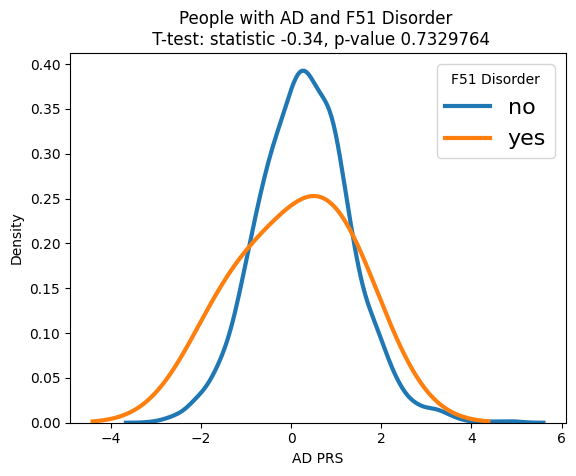

In [50]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(7)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [51]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

AD and F51 Disorder
People with AD and F51 Disorder: 3
People with AD and without F51 Disorder: 3578


In [52]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-0.34119548697342517, pvalue=0.7329764491779971)


## People with AD AND G47 Disorder

Text(0, 0.5, 'Density')

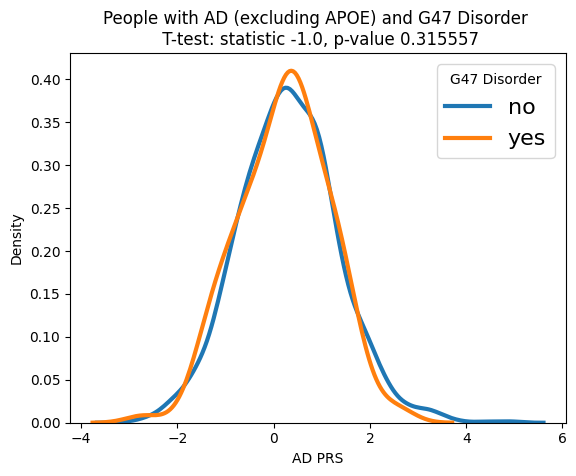

In [53]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='case']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
    subset1 = df_prs[df_prs['status']=='case']
    subset1 = subset1[subset1[disorder] == 'yes']

    subset2 = df_prs[df_prs['status']=='case']
    subset2 = subset2[subset2[disorder] == 'no']

    with_ndd_sleep = list(subset1[f'Z_score'])
    without = list(subset2[f'Z_score'])
    a = pd.DataFrame(stats.ttest_ind(with_ndd_sleep, without))
    s = a.loc[0,0].round(2)
    p = a.loc[1,0].round(6)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'People with {ndd} (excluding APOE) and {disorder} \n T-test: statistic {s}, p-value {p}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [54]:
subset1 = df_prs[df_prs['status']=='case']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='case']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'{ndd} and {disorder}')
print(f"People with {ndd} and {disorder}:", len(with_ndd_sleep))
print(f"People with {ndd} and without {disorder}:", len(without))

AD and G47 Disorder
People with AD and G47 Disorder: 137
People with AD and without G47 Disorder: 3444


In [55]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-1.003771248742433, pvalue=0.31555674386368887)


## Controls with F51 Disorder

Text(0, 0.5, 'Density')

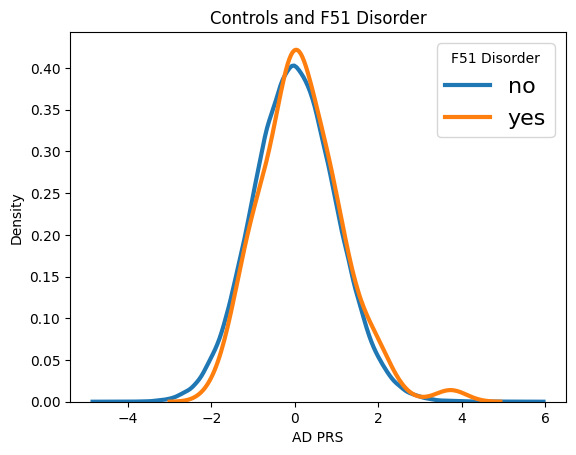

In [56]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'F51 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [57]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without F51 Disorder
Controls and F51 Disorder: 152
Controls without F51 Disorder: 237846


In [63]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-0.03710564567301177, pvalue=0.9704008016546355)


## Controls with G47 Disorder

Text(0, 0.5, 'Density')

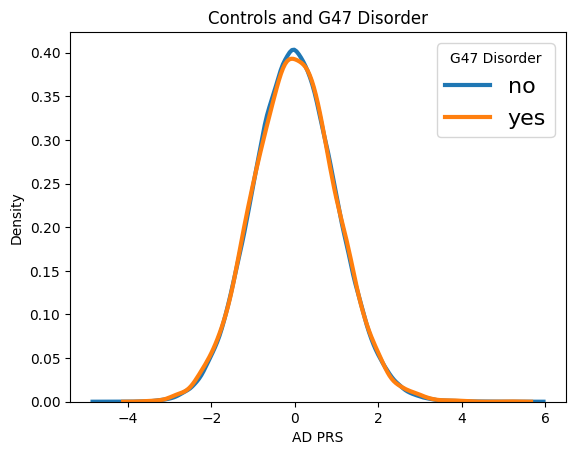

In [59]:
# Cases vs. Controls
groups = ['no', 'yes']
disorder = 'G47 Disorder'

# Iterate through the two groups
for group in groups:
    # Subset
    subset = df_prs[df_prs['status']=='control']
    subset = subset[subset[disorder] == group]
    
    # Draw the density plot
    plt = sns.distplot(subset[f'Z_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = group)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = disorder)
plt.set_title(f'Controls and {disorder}')
plt.set_xlabel(f'{ndd} PRS')
plt.set_ylabel('Density')

In [60]:
subset1 = df_prs[df_prs['status']=='control']
subset1 = subset1[subset1[disorder] == 'yes']

subset2 = df_prs[df_prs['status']=='control']
subset2 = subset2[subset2[disorder] == 'no']

with_ndd_sleep = list(subset1[f'Z_score'])
without = list(subset2[f'Z_score'])

print(f'Controls with/without {disorder}')
print(f"Controls and {disorder}:", len(with_ndd_sleep))
print(f"Controls without {disorder}:", len(without))

Controls with/without G47 Disorder
Controls and G47 Disorder: 7259
Controls without G47 Disorder: 230739


In [62]:
print('T_test')
print(stats.ttest_ind(with_ndd_sleep, without))

T_test
Ttest_indResult(statistic=-0.03710564567301177, pvalue=0.9704008016546355)
